<a href="https://colab.research.google.com/github/Pallavirampal/machine_learning/blob/master/california_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd



In [ ]:
# laod datasets
housing = pd.read_csv("/content/archive.zip")


In [ ]:
# displaying features
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# deali9ng with missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
x = housing.copy()

In [ ]:
y = x.drop('ocean_proximity',axis=1)

In [ ]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
y.head().to_string()

'   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value\n0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0\n1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0\n2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0\n3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0\n4    -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0'

In [ ]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imputed = imr.fit(y)
imp = imputed.fit_transform(y)
Dataframe = pd.DataFrame(imp,columns=y.columns)

In [ ]:
Dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
from sklearn.model_selection import train_test_split
a = Dataframe.iloc[:,:7].values
b = Dataframe.iloc[:,8].values
xtrain,xtest,ytrain,ytest = train_test_split(a,b,test_size=.3,random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(xtrain,ytrain)
pred = l.predict(xtest)
org = ytest
print("RMS:%s" %np.sqrt(np.mean(pred-org)**2))

RMS:1943.9080335702056


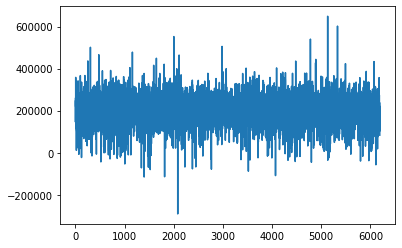

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pred)


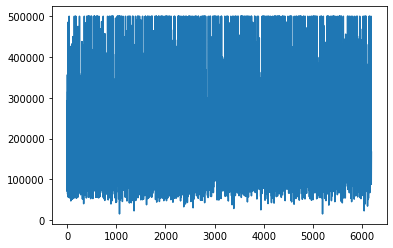

In [ ]:
plt.plot(org)

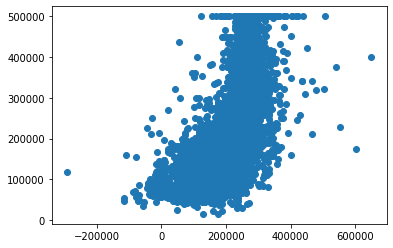

In [ ]:
plt.scatter(pred,org)